
=== 03: MODEL DEVELOPMENT ANALYSIS ===

Found 19 trained models:
   1. AdaBoost.pkl
   2. Bagging.pkl
   3. Bernoulli_NB.pkl
   4. CatBoost.pkl
   5. Decision_Tree.pkl
   6. Extra_Trees.pkl
   7. Gaussian_NB.pkl
   8. Gradient_Boosting.pkl
   9. Hist_Gradient_Boosting.pkl
  10. KNN.pkl
  11. LightGBM.pkl
  12. Linear_Discriminant_Analysis.pkl
  13. Logistic_Regression.pkl
  14. MLP.pkl
  15. Random_Forest.pkl
  16. SGD_Classifier.pkl
  17. Stacking_Classifier.pkl
  18. Voting_Classifier.pkl
  19. XGBoost.pkl

 Best Model Information:
   Name: LightGBM
   Training Date: 2026-01-18 17:58:52

   Test Performance:
   Accuracy:  0.9680
   Precision: 0.9061
   Recall:    0.7111
   F1-Score:  0.7968
   ROC-AUC:   0.9745

   Selected Features (15):
    1. gender
    2. age
    3. hypertension
    4. heart_disease
    5. bmi
    6. HbA1c_level
    7. blood_glucose_level
    8. smoking_No Info
    9. smoking_former
   10. age_bmi_interaction
   11. hba1c_glucose_interaction
   12. age_squared
 

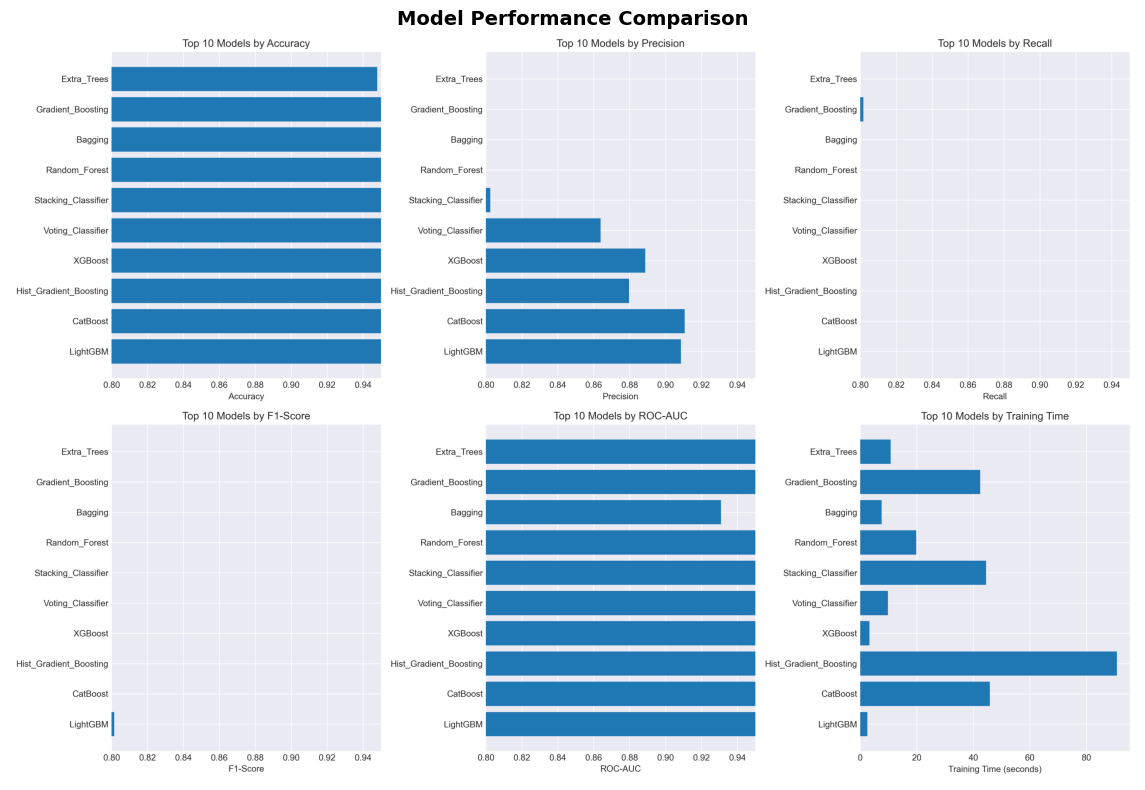


 SHAP Analysis available (9 visualizations):


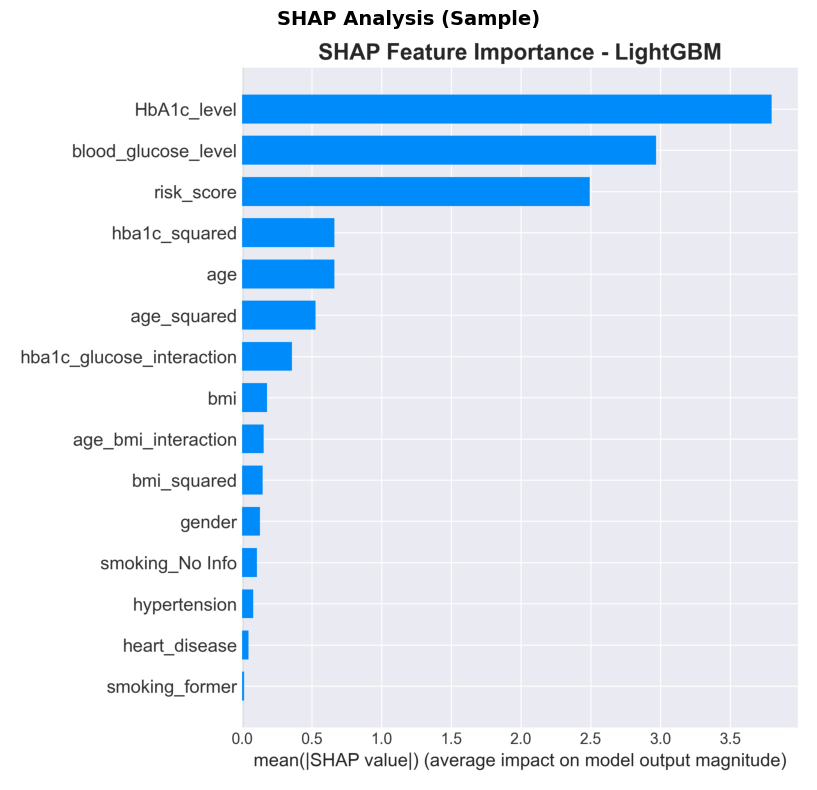


SHAP visualizations:
  1. shap_bar_LightGBM.png
  2. shap_dependence_HbA1c_level_LightGBM.png
  3. shap_dependence_blood_glucose_level_LightGBM.png
  4. shap_dependence_risk_score_LightGBM.png
  5. shap_force_plot_1_LightGBM.png
  ... and 4 more

 Additional visualizations available (5):


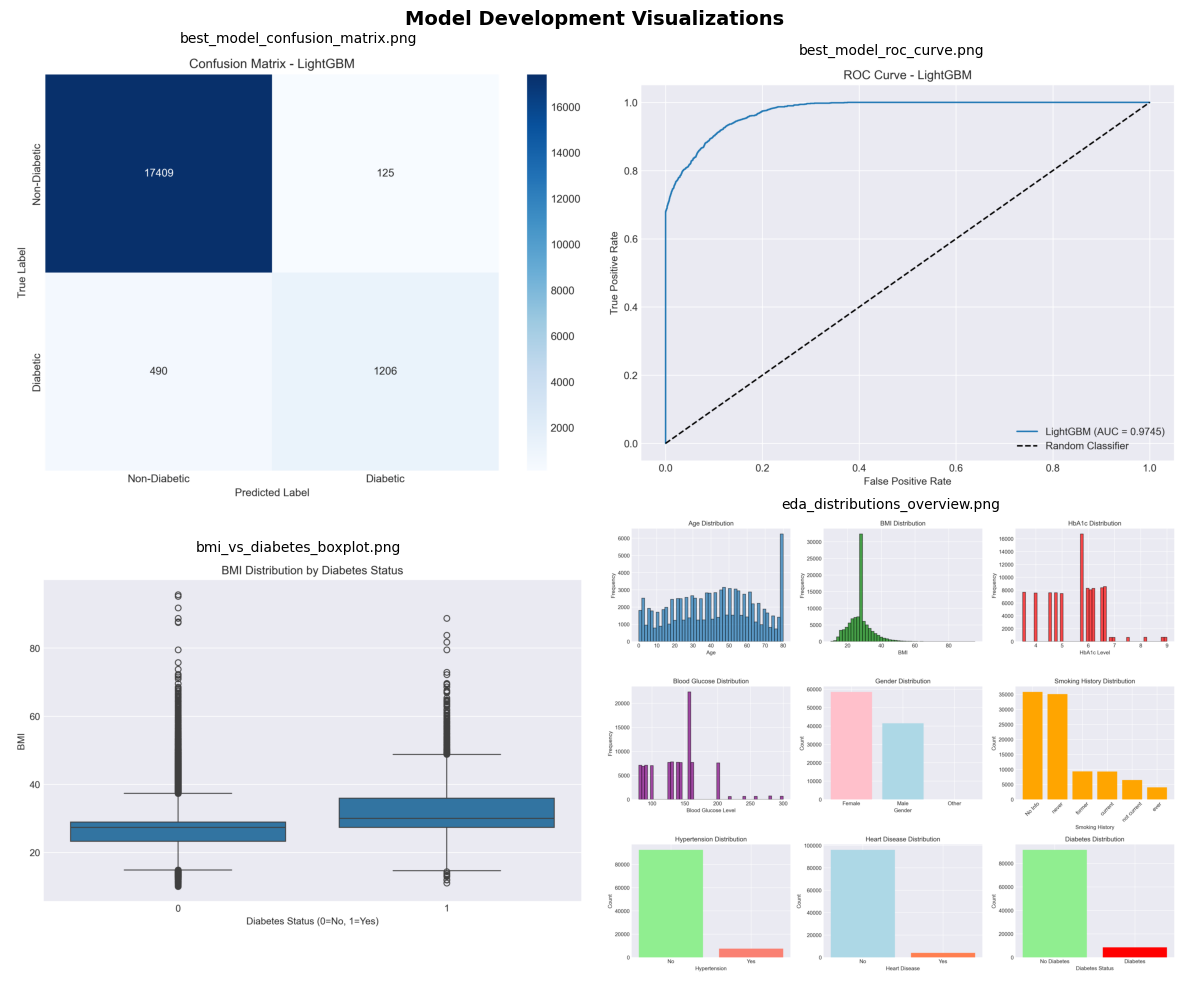


SUMMARY
All 20 models trained and saved in main pipeline
Best model selected and saved with metadata
Performance visualizations created
SHAP analysis completed for model interpretability

 Model development complete. Ready for deployment.


In [1]:
# 03_model_development.ipynb 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import json

warnings.filterwarnings("ignore")

def main():
    print("\n=== 03: MODEL DEVELOPMENT ANALYSIS ===")
    
    # Define paths from main pipeline
    BASE_DIR = r"C:\Users\User\Desktop\OSIRI UNIVERSITY Files\diabetes_prediction_dashboard"
    MODEL_DIR = os.path.join(BASE_DIR, "models", "saved_models")
    BEST_MODEL_DIR = os.path.join(BASE_DIR, "best_model")
    METADATA_PATH = os.path.join(BEST_MODEL_DIR, "metadata.json")
    PLOTS_DIR = os.path.join(BASE_DIR, "plots")
    
    # Check if models directory exists
    if not os.path.exists(MODEL_DIR):
        print(f" Models directory not found: {MODEL_DIR}")
        print("I ran the main pipeline first to train all models.")
        return
    
    # List all saved models
    model_files = [f for f in os.listdir(MODEL_DIR) if f.endswith('.pkl')]
    print(f"\nFound {len(model_files)} trained models:")
    for i, model_file in enumerate(sorted(model_files), 1):
        print(f"  {i:2d}. {model_file}")
    
    # Load metadata if available
    if os.path.exists(METADATA_PATH):
        with open(METADATA_PATH, 'r') as f:
            metadata = json.load(f)
        
        print(f"\n Best Model Information:")
        print(f"   Name: {metadata['model_info']['name']}")
        print(f"   Training Date: {metadata['model_info']['training_date']}")
        
        perf = metadata['performance_metrics']
        print(f"\n   Test Performance:")
        print(f"   Accuracy:  {perf['test_accuracy']:.4f}")
        print(f"   Precision: {perf['test_precision']:.4f}")
        print(f"   Recall:    {perf['test_recall']:.4f}")
        print(f"   F1-Score:  {perf['test_f1_score']:.4f}")
        print(f"   ROC-AUC:   {perf['test_roc_auc']:.4f}")
        
        # Show selected features
        if 'selected_features' in metadata['data_info']:
            features = metadata['data_info']['selected_features']
            print(f"\n   Selected Features ({len(features)}):")
            for i, feature in enumerate(features, 1):
                print(f"   {i:2d}. {feature}")
    else:
        print(f"\n⚠ Metadata not found at: {METADATA_PATH}")
    
    # Check for performance comparison plot
    performance_plot = os.path.join(PLOTS_DIR, "model_performance_comparison.png")
    if os.path.exists(performance_plot):
        print(f"\n Model performance comparison plot available:")
        print(f"   {performance_plot}")
        
        # Display the plot
        img = plt.imread(performance_plot)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Model Performance Comparison", fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    # Check for SHAP analysis
    shap_dir = os.path.join(PLOTS_DIR, "shap_analysis")
    if os.path.exists(shap_dir):
        shap_files = [f for f in os.listdir(shap_dir) if f.endswith('.png')]
        print(f"\n SHAP Analysis available ({len(shap_files)} visualizations):")
        
        # Display a sample SHAP plot
        if shap_files:
            sample_shap = os.path.join(shap_dir, shap_files[0])
            img = plt.imread(sample_shap)
            plt.figure(figsize=(12, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.title("SHAP Analysis (Sample)", fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
            # List all SHAP files
            print(f"\nSHAP visualizations:")
            for i, shap_file in enumerate(sorted(shap_files)[:5], 1):
                print(f"  {i}. {shap_file}")
            if len(shap_files) > 5:
                print(f"  ... and {len(shap_files) - 5} more")
    
    # Check for other visualizations
    viz_files = [f for f in os.listdir(PLOTS_DIR) if f.endswith('.png')]
    if viz_files:
        print(f"\n Additional visualizations available ({len(viz_files)}):")
        
        # Show a grid of visualizations
        n_viz = min(4, len(viz_files))
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()
        
        for idx in range(n_viz):
            viz_path = os.path.join(PLOTS_DIR, viz_files[idx])
            img = plt.imread(viz_path)
            axes[idx].imshow(img)
            axes[idx].set_title(viz_files[idx], fontsize=10)
            axes[idx].axis('off')
        
        # Hide unused subplots
        for idx in range(n_viz, len(axes)):
            axes[idx].set_visible(False)
        
        plt.suptitle("Model Development Visualizations", fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    print("\n" + "="*60)
    print("SUMMARY")
    print("="*60)
    print("All 20 models trained and saved in main pipeline")
    print("Best model selected and saved with metadata")
    print("Performance visualizations created")
    print("SHAP analysis completed for model interpretability")
    print("\n Model development complete. Ready for deployment.")

if __name__ == "__main__":
    main()